<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/zadanie3_poprawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [83]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's1': 0.5},
        'a1': {'s0': 1},
    },
    's1': {
        'a0': {'s0': 0.95, 's1': 0.05},
        'a1': {'s1': 1},
        'a2': {'s0': 1}
    },
}
rewards = {
    's0': {'a0': {'s0': +5, 's1': +5},
          'a1': {'s0': +1}},
    's1': {'a0': {'s0': -90, 's1': +5},
          'a1': {'s1': +1},
          'a2': {'s0': +0.7}
          },
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [84]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.05, 's1': 0.95},
        'a1': {'s0': 1},
        'a2': {'s1': 1}
    },
    's1': {
        'a0': {'s0': 0.5, 's1': 0.5},
        'a1': {'s1': 1}
    },
}
rewards = {
    's0': {'a0': {'s0': +5}},
    's1': {'a0': {'s0': +5}},
    's1': {'a0': {'s1': +5}},

    's0': {'a1': {'s0': +1}},
    's1': {'a1': {'s1': +1}},

    's0': {'a0': {'s1': -90}},
    's0': {'a2': {'s1': +0.7}},
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [85]:
next_state, reward, done, info = mdp.step('a1')
print(next_state, reward, done, info)

s0 0.0 False {}


In [86]:
mdp.get_all_states()

('s0', 's1')

In [87]:
mdp.get_possible_actions('s1')

('a0', 'a1')

In [88]:

mdp.get_next_states('s1', 'a0')

{'s0': 0.5, 's1': 0.5}

In [89]:
mdp.get_transition_prob('s1', 'a0', 's0')

0.5

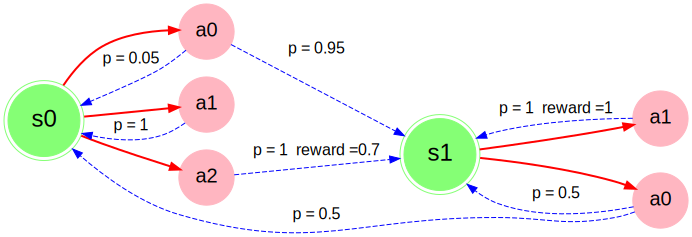

In [90]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [91]:
import random
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation

  print(t, observation, reward, done)

0 s0 0.0 False
1 s0 0.0 False
2 s1 0.7 False
3 s1 0.0 False
4 s1 1 False
5 s1 1 False
6 s0 0.0 False
7 s0 0.0 False
8 s0 0.0 False
9 s1 0.0 False
10 s1 1 False
11 s1 1 False
12 s1 1 False
13 s0 0.0 False
14 s1 0.7 False
15 s1 0.0 False
16 s1 1 False
17 s0 0.0 False
18 s0 0.0 False
19 s0 0.0 False
20 s0 0.0 False
21 s0 0.0 False
22 s1 0.7 False
23 s0 0.0 False
24 s0 0.0 False
25 s1 0.7 False
26 s1 1 False
27 s0 0.0 False
28 s1 0.7 False
29 s1 0.0 False
30 s1 1 False
31 s1 0.0 False
32 s1 0.0 False
33 s0 0.0 False
34 s1 0.7 False
35 s1 1 False
36 s1 1 False
37 s0 0.0 False
38 s1 0.0 False
39 s1 0.0 False
40 s0 0.0 False
41 s1 0.0 False
42 s1 0.0 False
43 s1 1 False
44 s0 0.0 False
45 s0 0.0 False
46 s0 0.0 False
47 s1 0.0 False
48 s1 1 False
49 s1 0.0 False
50 s1 1 False
51 s1 0.0 False
52 s1 0.0 False
53 s1 0.0 False
54 s1 1 False
55 s1 0.0 False
56 s1 1 False
57 s1 1 False
58 s1 0.0 False
59 s1 0.0 False
60 s0 0.0 False
61 s0 0.0 False
62 s1 0.0 False
63 s1 0.0 False
64 s0 0.0 False
65

In [92]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [93]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [94]:
gamma = 0.98
num_iter = 94
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 1.0 {'s0': 0, 's1': 0}
1 0.98 {'s0': 0.7, 's1': 1.0}
2 0.9603999999999999 {'s0': 1.68, 's1': 1.98}
3 0.941192 {'s0': 2.6403999999999996, 's1': 2.9404}
4 0.9223681600000004 {'s0': 3.5815919999999997, 's1': 3.881592}
5 0.9039207967999996 {'s0': 4.50396016, 's1': 4.80396016}
6 0.8858423808640001 {'s0': 5.4078809568, 's1': 5.7078809567999995}
7 0.8681255332467197 {'s0': 6.293723337664, 's1': 6.593723337664}
8 0.8507630225817859 {'s0': 7.1618488709107195, 's1': 7.461848870910719}
9 0.8337477621301499 {'s0': 8.012611893492505, 's1': 8.312611893492505}
10 0.8170728068875466 {'s0': 8.846359655622654, 's1': 9.146359655622655}
11 0.8007313507497962 {'s0': 9.663432462510201, 's1': 9.963432462510202}
12 0.7847167237347996 {'s0': 10.464163813259997, 's1': 10.764163813259998}
13 0.7690223892601047 {'s0': 11.248880536994797, 's1': 11.548880536994798}
14 0.7536419414749016 {'s0': 12.017902926254902, 's1': 12.317902926254902}
15 0.7385691026454033 {'s0': 12.771544867729803, 's1': 13.071544867729804}


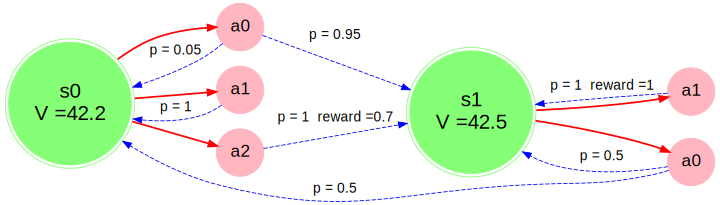

In [95]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

In [96]:

def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None
    
    action_values = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    argmax_index = np.argmax(action_values)
    return mdp.get_possible_actions(state)[argmax_index]

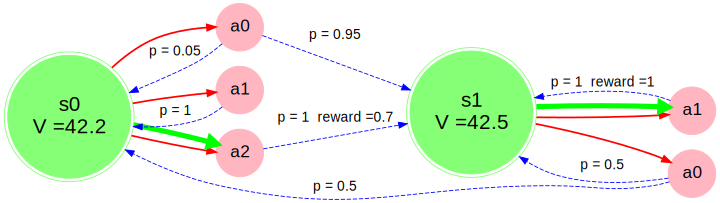

In [97]:
if has_graphviz:
    from mdp import plot_graph_optimal_strategy_and_state_values
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))